In [1]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 9.05 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [4]:
ls

gdrive/  sample_data/  YoloV3/


In [5]:
cd YoloV3/

/content/YoloV3


In [6]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png


In [0]:
mkdir weights

In [8]:
!pwd
!ls

/content/YoloV3
 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights


In [0]:
cp '/content/gdrive/My Drive/Colab Notebooks/Yolo/yolov3-spp-ultralytics.pt' '/content/YoloV3/weights'

In [0]:
rm -r '/content/YoloV3/data/customdata/images/'

In [0]:
rm -r '/content/YoloV3/data/customdata/labels/'

In [0]:
cp -r '/content/gdrive/My Drive/Colab Notebooks/Yolo/ShinChan/Images/.' '/content/YoloV3/data/customdata/images/'

In [0]:
cp -r '/content/gdrive/My Drive/Colab Notebooks/Yolo/ShinChan/Labels/.' '/content/YoloV3/data/customdata/labels/'

In [0]:
cp '/content/gdrive/My Drive/Colab Notebooks/Yolo/ShinChan/custom.names' '/content/YoloV3/data/customdata/custom.names'

In [0]:
cp '/content/gdrive/My Drive/Colab Notebooks/Yolo/ShinChan/custom.txt' '/content/YoloV3/data/customdata/custom.txt'

In [0]:
cp '/content/gdrive/My Drive/Colab Notebooks/Yolo/yolov3-custom.cfg' '/content/YoloV3/data/yolov3-custom.cfg'

In [17]:
cat '/content/YoloV3/data/customdata/custom.names'

ShinChan

In [18]:
cd '/content/YoloV3'

/content/YoloV3


In [25]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-25 08:29:21.795325: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (452 found, 0 missing, 46 empty, 0 duplicate, for 498 images): 100% 498/498 [00:00<00:00, 4017.52it/s]
Caching images (0.3GB): 100% 498/498 [00:01<00:00, 327.84it/s]
Caching labels (452 found, 0 missing, 46 empty, 0 duplicate, for 498 images): 100% 498

In [26]:
!python detect.py --conf-thres 0.1 --output out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/500 data/customdata/images/1.jpg: 512x512 1 ShinChans, Done. (0.020s)
image 2/500 data/customdata/images/10.jpg: 512x512 1 ShinChans, Done. (0.020s)
image 3/500 data/customdata/images/100.jpg: 512x384 1 ShinChans, Done. (0.021s)
image 4/500 data/customdata/images/101.jpg: 512x384 1 ShinChans, Done. (0.018s)
image 5/500 data/customdata/images/102.jpg: 512x512 1 ShinChans, Done. (0.021s)
image 6/500 data/customdata/images/103.jpg: 512x512 1 ShinChans, Done. (0.019s)
image 7/500 data/customdata/images/104.jpg

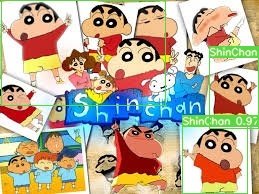

In [27]:
Image(filename='out/img(39).jpg')

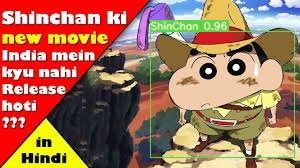

In [28]:
Image(filename='out/img-2020-04-24T195545.793.jpg', width=800)

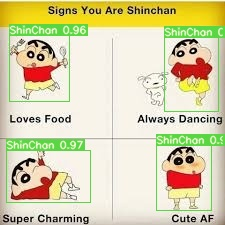

In [29]:
Image(filename='out/img-2020-04-24T195545.816.jpg', width=600)

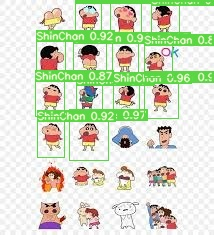

In [30]:
Image(filename='out/img-2020-04-24T195545.797.jpg', width=1200)

In [0]:
cp -r '/content/gdrive/My Drive/Colab Notebooks/Yolo/ShinChan/input-video/.' '/content/YoloV3/ShinChan/Input'

In [36]:
!python detect.py --conf-thres 0.15 --source '/content/YoloV3/ShinChan/Input' --output '/content/YoloV3/ShinChan/Output'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.15, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/YoloV3/ShinChan/Output', save_txt=False, source='/content/YoloV3/ShinChan/Input', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/3061 /content/YoloV3/ShinChan/Input/shin-001.png: 384x512 Done. (0.020s)
image 2/3061 /content/YoloV3/ShinChan/Input/shin-002.png: 384x512 Done. (0.016s)
image 3/3061 /content/YoloV3/ShinChan/Input/shin-003.png: 384x512 Done. (0.016s)
image 4/3061 /content/YoloV3/ShinChan/Input/shin-004.png: 384x512 Done. (0.016s)
image 5/3061 /content/YoloV3/ShinChan/Input/shin-005.png: 384x512 Done. (0.016s)
image 6/3061 /content/YoloV3/ShinChan/Input/shin-006.png: 384x512 Done. (0.01

In [0]:
cp -r '/content/YoloV3/ShinChan/Output/.' '/content/gdrive/My Drive/Colab Notebooks/Yolo/ShinChan/out_video/' 

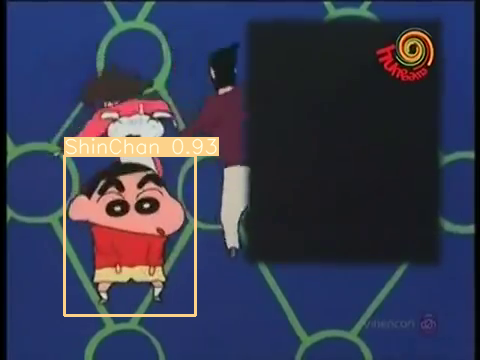

In [45]:
Image('/content/YoloV3/ShinChan/Output/shin-2889.png')